# Implementation of Bagging using Classification model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hr_dashboard_data.csv')
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,isPromoted
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,yes
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,yes
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,no
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,no
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,yes


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Name']=le.fit_transform(data['Name'])
data['Gender']=le.fit_transform(data['Gender'])
data['Department']=le.fit_transform(data['Department'])
data['Position']=le.fit_transform(data['Position'])
data['Joining Date']=le.fit_transform(data['Joining Date'])
data['isPromoted']=le.fit_transform(data['isPromoted'])
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,isPromoted
0,54,25,1,11,57,25,4.7,3,0,20,1
1,17,59,0,19,55,76,2.8,2,3,24,1
2,183,30,1,8,87,10,2.4,2,0,17,0
3,98,26,0,1,53,4,1.4,3,1,22,0
4,171,43,1,14,3,9,4.5,2,5,5,1


In [4]:
data.isna().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
isPromoted               0
dtype: int64

array([[<Axes: title={'center': 'Name'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Projects Completed'}>,
        <Axes: title={'center': 'Productivity (%)'}>,
        <Axes: title={'center': 'Satisfaction Rate (%)'}>],
       [<Axes: title={'center': 'Feedback Score'}>,
        <Axes: title={'center': 'Department'}>,
        <Axes: title={'center': 'Position'}>],
       [<Axes: title={'center': 'Joining Date'}>,
        <Axes: title={'center': 'isPromoted'}>, <Axes: >]], dtype=object)

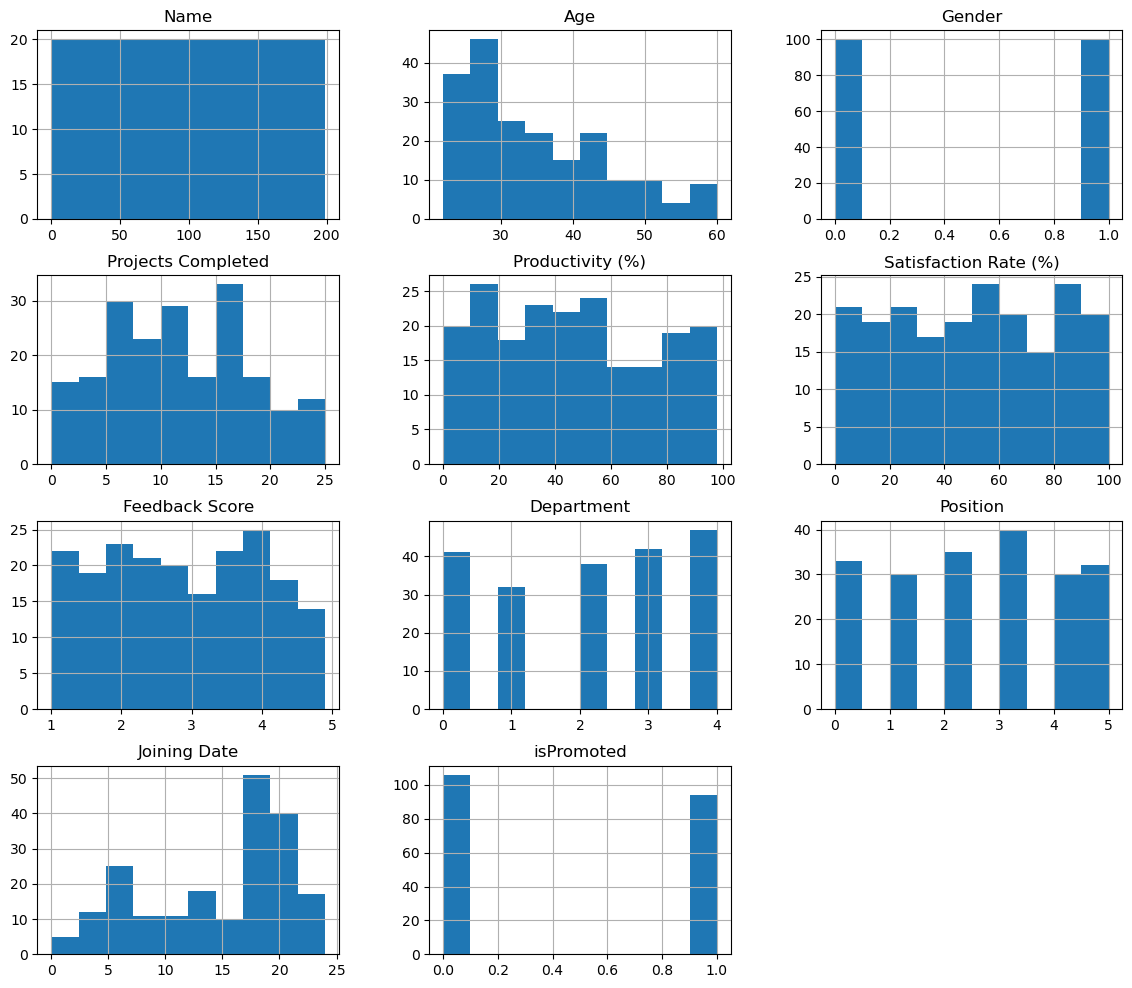

In [5]:
data.hist(figsize=(14,12))

In [6]:
x=data.iloc[:,1:-1]
x

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date
0,25,1,11,57,25,4.7,3,0,20
1,59,0,19,55,76,2.8,2,3,24
2,30,1,8,87,10,2.4,2,0,17
3,26,0,1,53,4,1.4,3,1,22
4,43,1,14,3,9,4.5,2,5,5
...,...,...,...,...,...,...,...,...,...
195,29,0,9,32,87,3.5,1,2,19
196,26,1,7,45,28,2.8,2,2,21
197,22,1,3,36,77,1.6,0,1,21
198,36,0,23,96,50,3.4,3,3,5


In [7]:
y=data.iloc[:,-1:]
y

,isPromoted
0,1
1,1
2,0
3,0
4,1
...,...
195,0
196,0
197,0
198,1


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.naive_bayes import GaussianNB
gas =GaussianNB()
gas.fit(xtrain,ytrain)
print('training was completed')
print()
gaspred = gas.predict(xtest)
print('The predicted values is :\n',gaspred)

training was completed

The predicted values is :
 [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0]


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_gas=accuracy_score(ytest,gaspred)
print('Accuracy Score:\t',accuracy_gas)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,gaspred))
print()
print('Classification report :\n',classification_report(ytest,gaspred))

Accuracy Score:	 0.65

Confusion Matrix:
 [[12  8]
 [ 6 14]]

Classification report :
               precision    recall  f1-score   support

           0       0.67      0.60      0.63        20
           1       0.64      0.70      0.67        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



In [12]:
from sklearn.naive_bayes import MultinomialNB
mul =MultinomialNB()
mul.fit(xtrain,ytrain)
print('training was completed')
print()
mulpred = mul.predict(xtest)
print('The predicted values is :\n',mulpred)

training was completed

The predicted values is :
 [0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 0 1 0]


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
accuracy_mul = accuracy_score(ytest,mulpred)
print('Accuracy Score:\t',accuracy_mul)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,mulpred))
print()
print('Classification report :\n',classification_report(ytest,mulpred))

Accuracy Score:	 0.8

Confusion Matrix:
 [[17  3]
 [ 5 15]]

Classification report :
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.83      0.75      0.79        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



In [17]:
from sklearn.naive_bayes import BernoulliNB
ber =BernoulliNB()
ber.fit(xtrain,ytrain)
print('training was completed')
print()
berpred = ber.predict(xtest)
print('The predicted values is :\n',berpred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_ber = accuracy_score(ytest,berpred)
print('Accuracy Score:\t', accuracy_ber)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,berpred))
print()
print('Classification report :\n',classification_report(ytest,berpred))

training was completed

The predicted values is :
 [0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 1 1 0]
Accuracy Score:	 0.625

Confusion Matrix:
 [[12  8]
 [ 7 13]]

Classification report :
               precision    recall  f1-score   support

           0       0.63      0.60      0.62        20
           1       0.62      0.65      0.63        20

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.62        40
weighted avg       0.63      0.62      0.62        40



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=gas,n_estimators=5,random_state=1)
bag.fit(xtrain,ytrain)
bagpred = bag.predict(xtest)
print('*'*100)
print('the predication of bag is:\n',bagpred)
print()
print('*'*100)
accuracy_bag = accuracy_score(ytest,bagpred)
print('Accuracy Score:\t',accuracy_bag)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,bagpred))
print('*'*100)
print('Classification report :\n',classification_report(ytest,bagpred))

****************************************************************************************************
the predication of bag is:
 [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 0 0 0]

****************************************************************************************************
Accuracy Score:	 0.65
****************************************************************************************************
Confusion Matrix:
 [[13  7]
 [ 7 13]]
****************************************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.65      0.65      0.65        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=10,random_state=1)
ran.fit(xtrain,ytrain)
ranpred = ran.predict(xtest)
print('&'*100)
print('the predication of bag is:\n',ranpred)
print()
print('&'*100)
accuracy_ran = accuracy_score(ytest,ranpred)
print('Accuracy Score:\t',accuracy_ran)
print('&'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ranpred))
print('&'*100)
print('Classification report :\n',classification_report(ytest,ranpred))

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the predication of bag is:
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1
 0 0 0]

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Accuracy Score:	 0.65
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Confusion Matrix:
 [[17  3]
 [11  9]]
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Classification report :
               precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.75      0.45      0.56        20

    accuracy                           0.65        40
   macro avg       0.68      0.65      0.64        40
weighted avg       0.68      0.65      0.64        40



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7852\2945233237.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran.fit(xtrain,ytrain)


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)

et.fit(xtrain,ytrain)
etpred = et.predict(xtest)
print('*'*100)
print('the predication of bag is:\n',etpred)
print()
print('*'*100)
accuracy_et = accuracy_score(ytest,etpred)
print('Accuracy Score:\t',accuracy_et)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,etpred))
print('*'*100)
print('Classification report :\n',classification_report(ytest,etpred))

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
****************************************************************************************************
the predication of bag is:
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0
 0 0 0]

****************************************************************************************************
Accuracy Score:	 0.625
****************************************************************************************************
Confusion Matrix:
 [[17  3]
 [12  8]]
****************************************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.59      0.85      0.69        20
           1       0.73      0.40      0.52        20

    accuracy 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7852\1781233587.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(xtrain,ytrain)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rand_for_1 = RandomForestClassifier(n_estimators=10, random_state=1, max_depth=None)
rand_for_1.fit(xtrain, ytrain)
ypred_rand_1 = rand_for_1.predict(xtest)

accuracy_rand_1 = accuracy_score(ytest, ypred_rand_1)
print("Accuracy Score:", accuracy_rand_1)
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred_rand_1))
print("Classification Report:\n", classification_report(ytest, ypred_rand_1))

Accuracy Score: 0.65
Confusion Matrix:
 [[17  3]
 [11  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.75      0.45      0.56        20

    accuracy                           0.65        40
   macro avg       0.68      0.65      0.64        40
weighted avg       0.68      0.65      0.64        40



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7852\4235537467.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_for_1.fit(xtrain, ytrain)


In [30]:
from sklearn.metrics import accuracy_score

scores = [
    ('Gaussian_NB', accuracy_gas),
    ('Multinomial NB', accuracy_mul),
    ('Bernoulli NB', accuracy_ber),
    ('Bagging classifier', accuracy_bag),
    ('RandomForest Classifier', accuracy_ran),
    ('RandomForest Classifier with pruning', accuracy_rand_1),
    ('ExtraTrees Classifier', accuracy_et)
]


Acc_scores = pd.DataFrame(scores, columns=['Model', 'Accuracy_score'])


print(Acc_scores.sort_values(by='Accuracy_score', ascending=False))

                                  Model  Accuracy_score
1                        Multinomial NB           0.800
0                           Gaussian_NB           0.650
3                    Bagging classifier           0.650
4               RandomForest Classifier           0.650
5  RandomForest Classifier with pruning           0.650
2                          Bernoulli NB           0.625
6                 ExtraTrees Classifier           0.625


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial NB'),
  Text(2, 0, 'Bernoulli NB'),
  Text(3, 0, 'Bagging classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

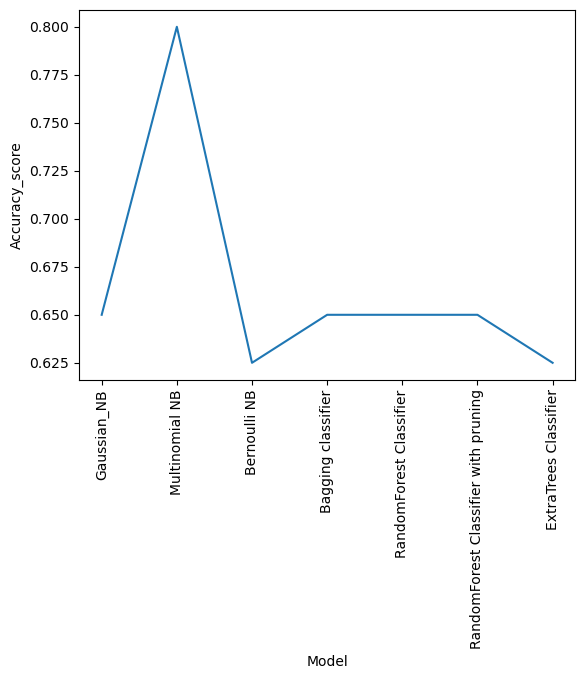

In [31]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)

#  Implementation of Bagging using Regression model

In [32]:
data = pd.read_csv('hr_dashboard_data.csv')
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,isPromoted
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,yes
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,yes
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,no
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,no
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,yes


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Name']=le.fit_transform(data['Name'])
data['Gender']=le.fit_transform(data['Gender'])
data['Department']=le.fit_transform(data['Department'])
data['Position']=le.fit_transform(data['Position'])
data['Joining Date']=le.fit_transform(data['Joining Date'])
data['isPromoted']=le.fit_transform(data['isPromoted'])
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,isPromoted
0,54,25,1,11,57,25,4.7,3,0,20,1
1,17,59,0,19,55,76,2.8,2,3,24,1
2,183,30,1,8,87,10,2.4,2,0,17,0
3,98,26,0,1,53,4,1.4,3,1,22,0
4,171,43,1,14,3,9,4.5,2,5,5,1


Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
isPromoted               0
dtype: int64

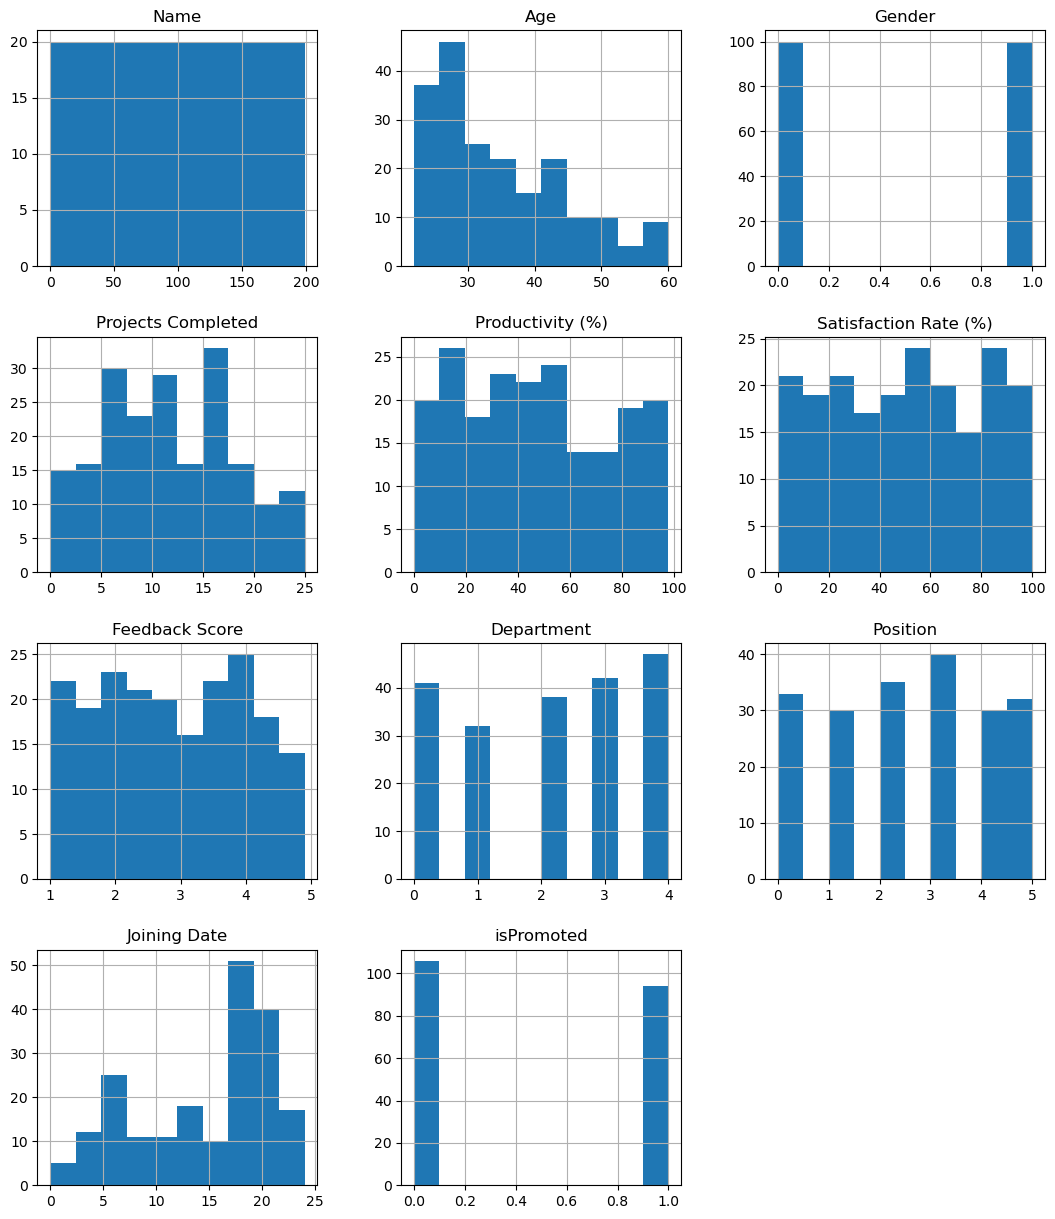

In [35]:
data.hist(figsize=(13,15))
sns.countplot(data=data,x='isPromoted')
data.isna().sum()

In [36]:
x=data.iloc[:,1:-1]
x

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date
0,25,1,11,57,25,4.7,3,0,20
1,59,0,19,55,76,2.8,2,3,24
2,30,1,8,87,10,2.4,2,0,17
3,26,0,1,53,4,1.4,3,1,22
4,43,1,14,3,9,4.5,2,5,5
...,...,...,...,...,...,...,...,...,...
195,29,0,9,32,87,3.5,1,2,19
196,26,1,7,45,28,2.8,2,2,21
197,22,1,3,36,77,1.6,0,1,21
198,36,0,23,96,50,3.4,3,3,5


In [37]:
y=data.iloc[:,-1:]
y

,isPromoted
0,1
1,1
2,0
3,0
4,1
...,...
195,0
196,0
197,0
198,1


In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (160, 9)

Training data-y- Shape:	 (160, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (40, 9)

Testing data(y-Outcome) Shape:	 (40, 1)


# 1. Linear Regression Model 

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed


In [42]:
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 0.3874728515759793

MSE-linear Regression:	 0.15313178710600517

RMSE linear Regression:	 0.39132056821231


# 2. KNN Regression

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
print()
print('Testing completed')
print('='*100)


****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase

Testing completed


In [45]:
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)

****************************************************************************************************
KNN Regression - Performance Measures
****************************************************************************************************
Accuracy Score - knn Regression:	 0.1777777777777778

MSE-knn Regression:	 0.20555555555555555

RMSE knn Regression:	 0.45338235029118146


# 3. Decision Tree Regression model

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed


In [48]:
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 0.0

MSE-DT Regression:	 0.25

RMSE DT Regression:	 0.5


# 4. Support Vector Regressor

In [51]:
from sklearn.svm import SVR
svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Completed

 Test Phase

Testing completed


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('SVR Regression - Performance Measures')
print('*'*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))
print('Accuracy Score - SVR Regression:\t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression - Performance Measures
****************************************************************************************************
Accuracy Score - SVR Regression:	 0.4429903675189517

MSE-SVR Regression:	 0.13925240812026207

RMSE SVR Regression:	 0.3731653897674087


# 5. Boosting - GradientBoost

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression - Performance Measures
****************************************************************************************************
Accuracy Score - GradientBoosting Regression:	 0.36564729932456286

MSE-GradientBoosting Regression:	 0.15858817516885929

RMSE GradientBoosting Regression:	 0.3982313086245973


# 6.Boosting - Adaboost with the base model - Lin Reg

In [60]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training Completed

 Test Phase

Testing completed


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [61]:
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
Adaboost Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Adaboost Regression:	 0.3817170665378794

MSE-Adaboost Regression:	 0.15457073336553015

RMSE Adaboost Regression:	 0.3931548465497153


# Accuracy scores of models

In [64]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('SVR',Accuracy_svr),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),

 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
3                       SVR        0.442990
0         Linear Regression        0.387473
4        Adaboost Regressor        0.381717
5  Gradient Boost Regressor        0.365647
1            KNN Regression        0.177778
2  Decision Tree Regression        0.000000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

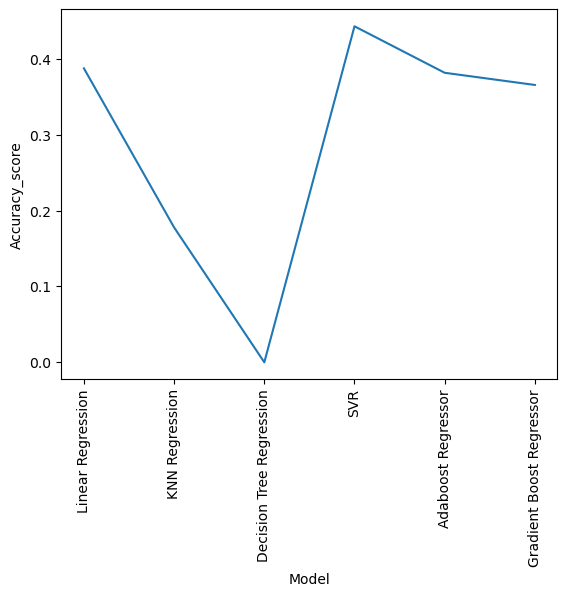

In [65]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)